Análise Exploratória com SQL: dados de crédito para uma base de clientes

Objetivo: Realizar uma análise exploratória de dados (EDA) em uma base de clientes com informações de crédito bancário.
Primeiramente iremos explorar os dados e depois analisaremos eles dentro do contexto esperado.

1. Quantas linhas compõem o dataset? 🔍

In [ ]:
SELECT COUNT(*) AS linhas
FROM credito;

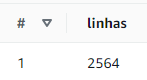

2. Quais são os tipos de dados? 🔍

In [ ]:
DESCRIBE credito;

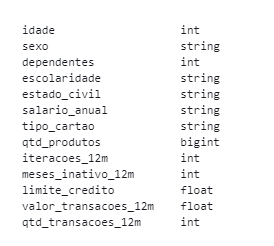

3. Faixa de idade dos clientes 🔍

In [ ]:
SELECT
    MIN(idade) as idade_min,
    MAX(idade) as idade_max,
    CAST(AVG(idade) AS int) AS
        media_idade,
    CAST(STDDEV(idade) AS int) AS
        std_idade
FROM credito;

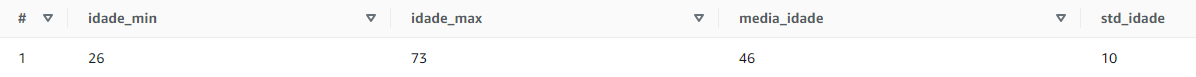

* **A idade dos clientes se encontra bem distribuída entre 26-73, com a média de 46 anos sendo bem representativa**


4. Distribuição do sexo dos clientes 🔍

In [ ]:
SELECT
    sexo,
    COUNT(sexo) AS
        clientes,
    ROUND(COUNT(sexo)/10127.00, 2) AS
        porcentagem
FROM credito
GROUP BY sexo;

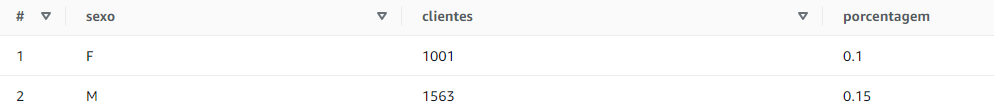

* **A proporção de clientes do sexos feminino e masculino é aproximadamente igual**

5. Número de dependentes 🔍

In [ ]:
SELECT
    dependentes AS
        numero_dependentes,
    ROUND(COUNT(dependentes)/10127.00, 2) AS
        porcentagem
FROM credito
GROUP BY dependentes
ORDER BY 2 DESC;

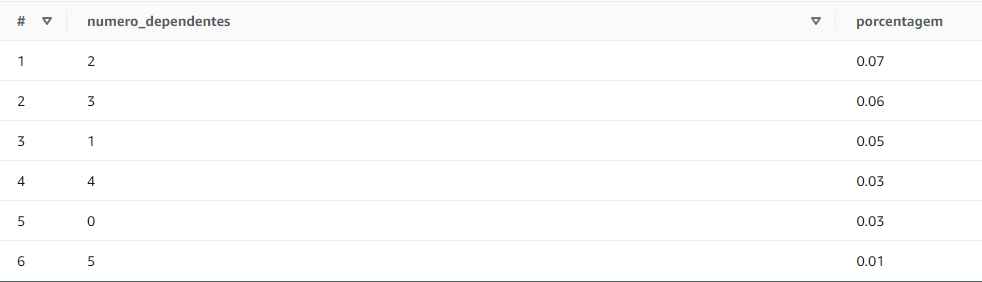



*   **Cerca de 91% dos clientes possuem ao menos 1 dependente**
*   **A cada 100 clientes aleatórios: 18 possuem 1 depentente, enquanto 73 têm 2 dependentes ou mais**


6. Escolaridade dos clientes 🔍

In [ ]:
SELECT
    escolaridade,
    COUNT(escolaridade) AS
        nivel_escolaridade,
    ROUND(COUNT(escolaridade)/8608.00, 2) AS
        porcentagem
FROM credito
GROUP BY escolaridade
ORDER BY 3 DESC;

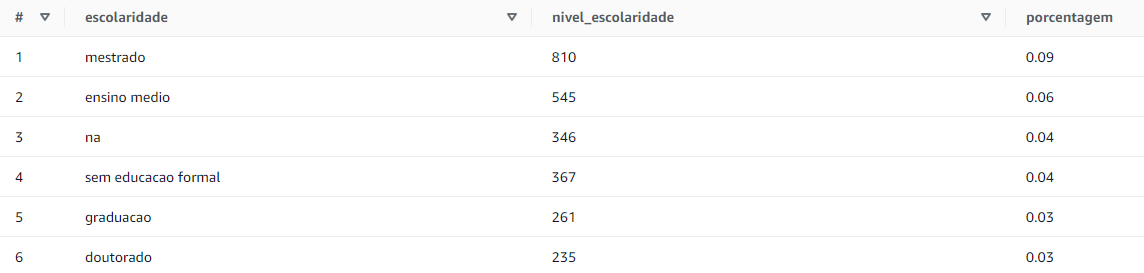



*   **A cada 100 clientes, 15 não têm educação formal**
*   **Cerca de 51% possui algum tipo de ensino superior**
*   **Não costam informações acerca da escolaridade para 1519 clientes (~15%)**

7. Estado civil dos clientes 🔍

In [ ]:
SELECT
    estado_civil,
    COUNT(estado_civil) AS
        clientes,
    ROUND(COUNT(estado_civil)/10127.00, 2) AS
        porcentagem
FROM credito
GROUP BY estado_civil
ORDER BY 3 DESC;

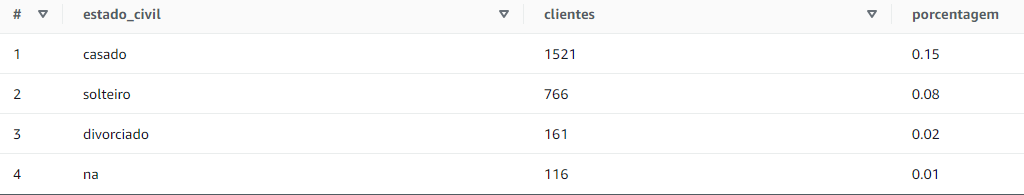

* **Casados e solteiros compreendem 85% da base de clientes**

9 Distribuição de clientes quanto ao tipo de cartão 🔍

In [ ]:
SELECT
    tipo_cartao,
    COUNT(tipo_cartao) AS
        clientes,
    ROUND(COUNT(tipo_cartao)/10127.00*100, 3) AS
        porcentagem
FROM credito
GROUP BY tipo_cartao
ORDER BY 3 DESC;

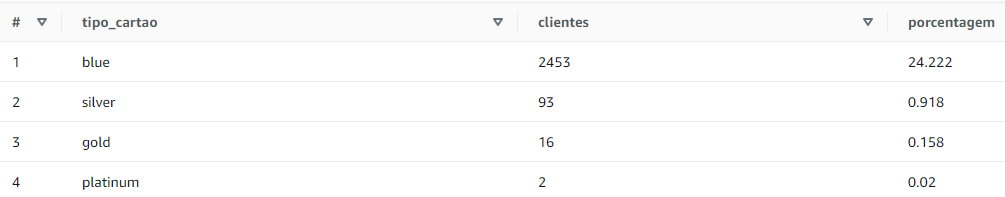

* **Cerca de 93% clientes possui o cartão Blue**
* **Da mesma maneira, muito poucos clientes possuem o cratao Platinum, talvez seja interessante repensar essa modalidade**

10. Distribuição do limite do crédito dos clientes  🔍

In [ ]:
SELECT
        ROUND(MIN(limite_credito), 2) AS
        limite_minimo,
        ROUND(MAX(limite_credito), 2) AS
        limite_maximo,
        ROUND(AVG(limite_credito), 2) AS
        limite_medio,
        ROUND(STDDEV(limite_credito), 2) AS
        std_limite
    FROM credito;

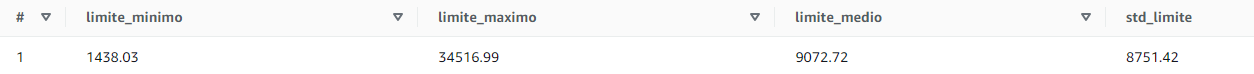

* **A diferença entre o limite mínimo e o limite máximo é expressiva (R$ 33.078,99)**

* **Como o desvio padrão para o limite médio entre os clientes é alto (R$ 9.088,70), o limite de R$ 8.632,44 não representa a média para a base de clientes)**

* **O valor central para o limite é de R$ 4.549,42 (mediana)**

* **Existem muitos outliers, isto é, clientes com limites discrepantes dos demais**

11.  Como temos dados ausentes nas colunas escolaridade, estado civil e salário anual, vamos trabalhar em cima de uma view:

In [ ]:
--Criando a view sem dados ausentes:
CREATE VIEW credito_eda AS
SELECT *
FROM credito
WHERE
  (escolaridade != 'na') AND
  (estado_civil != 'na') AND
  (salario_anual != 'na');

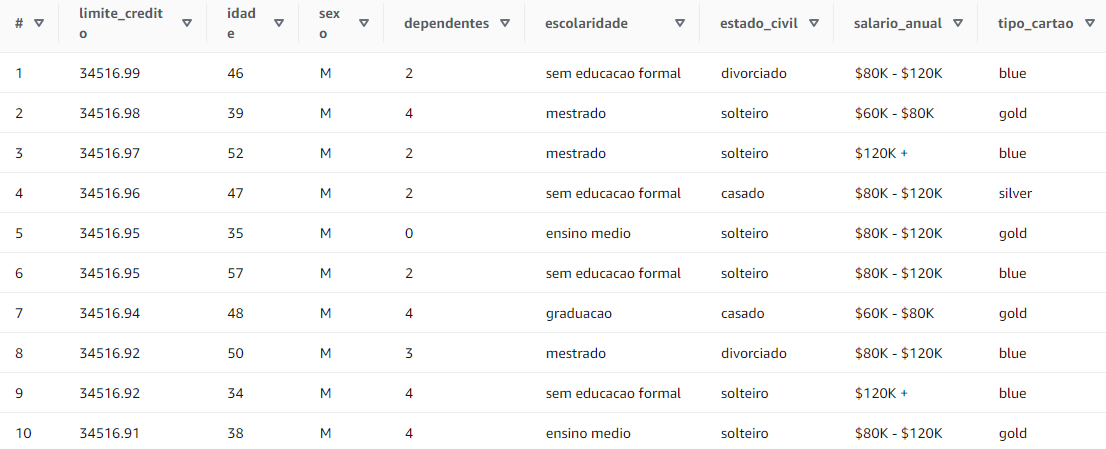

12. Quais as características dos clientes com maior limite? 🔍

In [ ]:
SELECT
  limite_credito, idade, sexo,
  dependentes, escolaridade,
  estado_civil, salario_anual,
  tipo_cartao, qtd_produtos,
  valor_transacoes_12m,
  qtd_transacoes_12m
FROM credito_eda
ORDER BY 1 DESC
LIMIT 10;

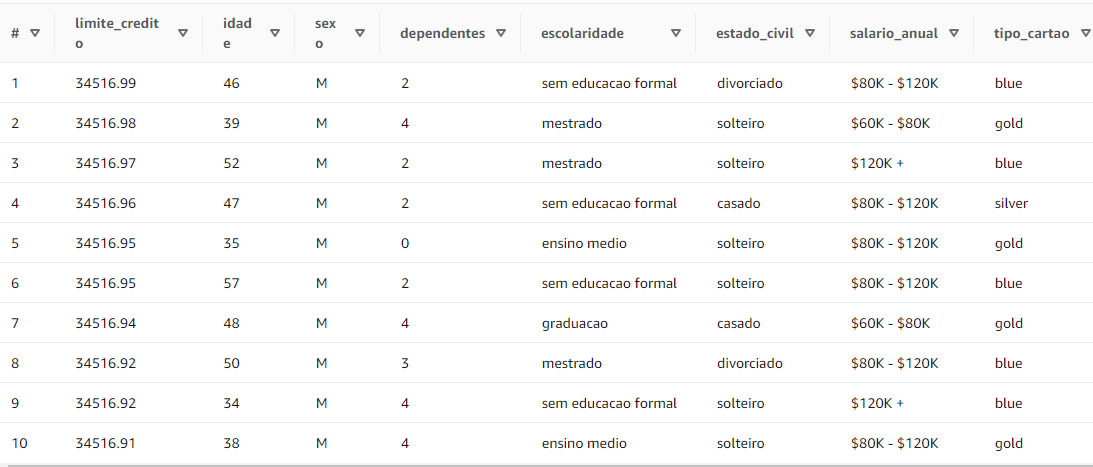

* **O sexo predominante para os clientes de maior limite é o masculino (de uma amostra de 10 clientes, 100% são homens.**

* **O número de dependentes se situa entre 2 e 4. Na amostra acima, a moda é 4 dependentes.**

* **Embora possa contribuir, a educação não parece ser um empecilho para adquirir maiores limites de crédito.**

* **O estado civil é indiferente quanto ao limite de crédito.**

* **Clientes com maiores limites normalemente possuem os cartões Silver and Gold. Intrigantemente, o cartão Platinum não aparece nos maiores limites.**


13. Quais as características dos clientes com menor limite?🔍

In [ ]:
SELECT
  limite_credito, idade, sexo,
  dependentes, escolaridade,
  estado_civil, salario_anual,
  tipo_cartao, qtd_produtos,
  valor_transacoes_12m,
  qtd_transacoes_12m
FROM credito_eda
ORDER BY 1 ASC
LIMIT 10;

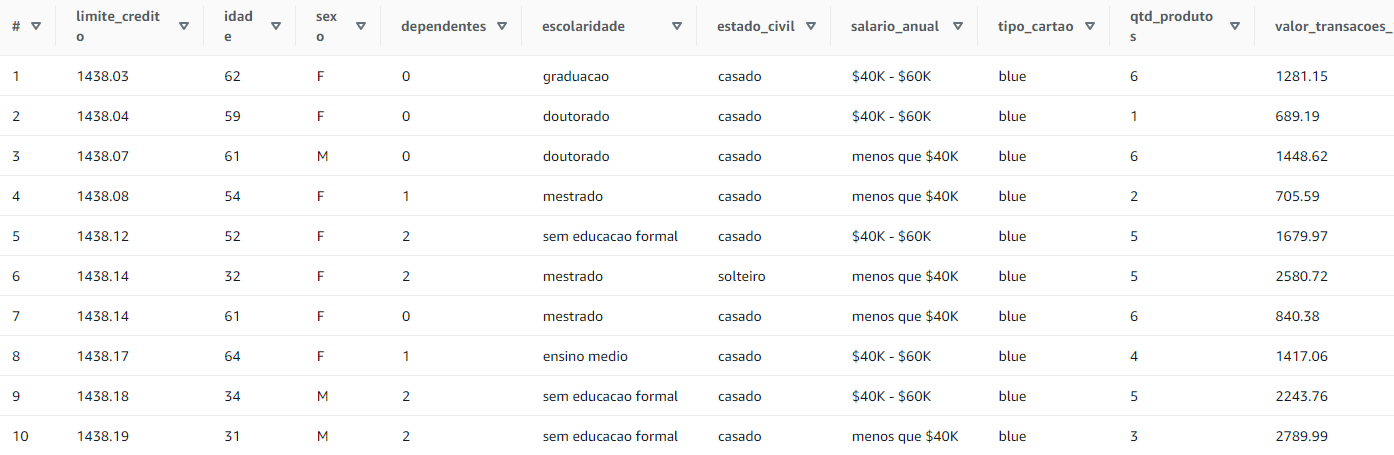

* **Os clientes com menores limites são do sexo feminino. De uma amostra de 10 clientes, 90% são do sexo feminino.**
* **Dos clientes com os 10 menores limites, todos são do tipo de cartão blue.**
* **Dentre os clientes com menores limites, o estado civil majoritário é o casado.**

14. Os homens possuem mais limite que as mulheres?🔍

In [ ]:
SELECT
  sexo,
  COUNT(limite_credito)/7081.00 AS porcentagem
FROM credito_eda
WHERE limite_credito > 11000
GROUP BY sexo
ORDER BY 2 DESC;

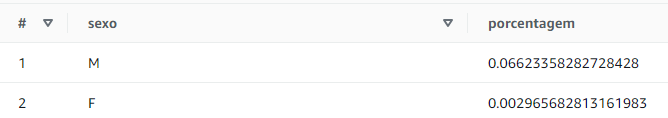

* **Para limites maiores que R$ 11.000,00 (3° quartil), apenas 2% dos clientes são mulheres versus 22% dos homens. Ou seja, homens possuem mais limites que as mulheres.**


15. Isso é reflexo do salário?🔍

In [ ]:
SELECT
  sexo,
  salario_anual,
  COUNT(salario_anual) as total_clientes
FROM credito_eda
GROUP BY
  sexo,
  salario_anual
ORDER BY 2, 1;

 * **De fato, os maiores limites dos clientes do sexo masculino se devem aos maiores salários dos homens frente as mulheres.**

 * **Para salários anuais maiores que R$ 80.000,00 não costam clientes do sexo feminino.**


 16. Qual a porcentagem de clientes com altos limites, mas cartão blue? 🔍

In [ ]:
--Total de clientes do cartão blue:
SELECT COUNT(*) AS clientes
FROM credito_eda
WHERE tipo_cartao = 'blue';

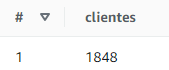

In [ ]:
--Aqui podemos usar uma sub-query:
SELECT
  SUM(clientes)/6598.00*100 AS porcentagem
FROM(
     SELECT
       COUNT(tipo_cartao) AS clientes
     FROM credito_eda
     WHERE
       tipo_cartao = 'blue'
     AND
       limite_credito >= 34500
     GROUP BY limite_credito
     ORDER BY limite_credito DESC
);

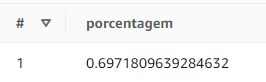

* **Apenas 2% dos clientes com maiores limites (acima do R$ 34500) são do cartão blue.**
* **Isso indica que o cartão blue são destinados ao clientes com limites na média da base de dados.**

17.  Qual é o contexto dos clientes que se mostram outliers (quanto ao limite) para a empresa? 🔍

In [ ]:
/*Vamos supor que uma inatividade maior que 30% ao longo de 12 meses,
represente um cliente cuja inativatividade é tida como considerável.
Portanto, essa inatividade não é ideal para o contexto da empresa*/

SELECT
  classe_cliente,
  percentual_inatividade,
  COUNT(percentual_inatividade) AS total_inatividade_12m
FROM(
    SELECT
    CASE
        WHEN limite_credito >= 25000 THEN 'Outlier'
        ELSE 'Comumn'
     END AS classe_cliente,
     CASE
        WHEN (meses_inativo_12m/12.00 >= 0.3) THEN 'Considerável'
        ELSE 'Ideal'
     END AS percentual_inatividade
     FROM credito_eda
     ORDER BY 1 DESC)
GROUP BY classe_cliente, percentual_inatividade
ORDER BY 1 DESC;

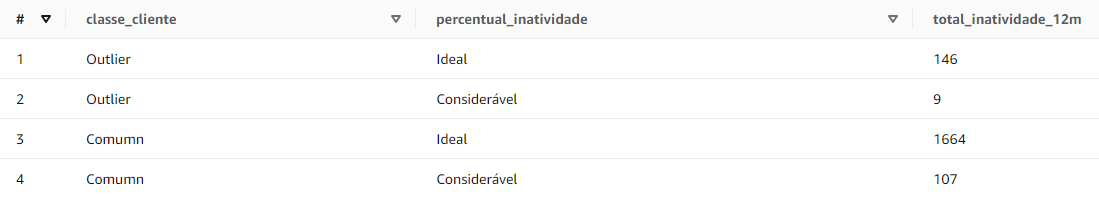

* **Como a proporção de clientes com inatividade ideal ao longo de 12 meses frente àqueles com inatividade considerável é muito maior, tanto para os clientes comuns quanto para os outliers, então podemos afirmar que os outliers são positivos para o cenário da empresa.**


Conclusões:

Com base nas queries executadas:

* **A idade média dos clientes é de 46 anos, com a idade mínima de 26 anos. Isso é pertinente para campanhas de marketing da empresa;**

* **A distribuição de clientes dos sexos feminino e masculino é praticamente igual;**

* **Apenas 0,2% dos clientes possuem o cartão Platinum, logo esse cartão poderia ser repensado por parte da empresa;**

* **Constatou-se que os homens possuem maiores limites que as mulheres, onde os maiores salários para o clientes do sexo masculino são determinantes para os maiores limites de crédito;**

* **A diferença de limite de crédito quanto ao sexo do cliente é inerente à empresa;**

* **Ter nenhum ou 5 dependentes parece não influenciar no limite de crédito;**

* **Clientes com maiores limites transacionaram menos de 50% do valor do limite nos últimos 12 meses, enquanto aqueles com menores limites extrapolaram em relação ao valor do limite (alguns chegaram a movimentar 3 vezes mais do que o valor de seu limite de crédito);**

* **Os outliers são positivos para o contexto da empresa.**

